In [1]:
from google.colab import files
uploaded = files.upload()

Saving Full-Economic-News.csv to Full-Economic-News.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
Global_headlines_df = pd.read_csv('Full-Economic-News.csv', encoding = "ISO-8859-1")

In [4]:
Global_headlines_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/2015 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/1991,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/2015 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/2007,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/2015 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/1991,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/2015 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/1986,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/2015 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/2002,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [5]:
Global_headlines_df = Global_headlines_df.loc[:,['headline']]

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

cs = []
for row in range(len(Global_headlines_df)):
    cs.append(analyzer.polarity_scores(Global_headlines_df['headline'].iloc[row])['compound'])

Global_headlines_df['compound_vader_score'] = cs
Global_headlines_df = Global_headlines_df[(Global_headlines_df[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

Global_headlines_df

,headline,compound_vader_score
0,Banking Bill Negotiators Set Compromise --- Pl...,0.2960
1,Manager's Journal: Sniffing Out Drug Abusers I...,-0.7003
2,"Bank of Montreal, Royal Bank Profits Rose in 2...",0.4404
3,Battle Over Medical Costs Isn't Over,-0.3818
4,"Dow Falls 45.95, Late GM Surge Stanches Losses",-0.4019
...,...,...
4841,Stocks Rise for Third Straight Session: Better...,0.7579
4842,"Sawyer Sees Strong Economy For 2 Years, Truce ...",0.5106
4843,Oil's losses are airlines' gains,-0.0772
4844,Full Senate to vote on Bernanke; PANEL ADVANCE...,-0.3612


In [7]:
import nltk

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
Global_headlines_df.loc[Global_headlines_df['compound_vader_score'] < 0, 'sentiment'] = '0'
Global_headlines_df.loc[Global_headlines_df['compound_vader_score'] > 0, 'sentiment'] = '1'

Global_headlines_df.head()

,headline,compound_vader_score,sentiment
0,Banking Bill Negotiators Set Compromise --- Pl...,0.2960,1
1,Manager's Journal: Sniffing Out Drug Abusers I...,-0.7003,0
2,"Bank of Montreal, Royal Bank Profits Rose in 2...",0.4404,1
3,Battle Over Medical Costs Isn't Over,-0.3818,0
4,"Dow Falls 45.95, Late GM Surge Stanches Losses",-0.4019,0


In [12]:
Global_headlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   headline              4846 non-null   object 
 1   compound_vader_score  4846 non-null   float64
 2   sentiment             4846 non-null   object 
dtypes: float64(1), object(2)
memory usage: 113.7+ KB


In [13]:
Global_headlines_df['sentiment'] = Global_headlines_df['sentiment'].astype(int)

In [14]:
Global_headlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   headline              4846 non-null   object 
 1   compound_vader_score  4846 non-null   float64
 2   sentiment             4846 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 113.7+ KB


In [15]:
Global_headlines_df.head()

,headline,compound_vader_score,sentiment
0,Banking Bill Negotiators Set Compromise --- Pl...,0.2960,1
1,Manager's Journal: Sniffing Out Drug Abusers I...,-0.7003,0
2,"Bank of Montreal, Royal Bank Profits Rose in 2...",0.4404,1
3,Battle Over Medical Costs Isn't Over,-0.3818,0
4,"Dow Falls 45.95, Late GM Surge Stanches Losses",-0.4019,0


In [16]:
Global_headlines_df = Global_headlines_df.loc[:,['headline', 'sentiment']]

In [17]:
Global_headlines_df.head()

,headline,sentiment
0,Banking Bill Negotiators Set Compromise --- Pl...,1
1,Manager's Journal: Sniffing Out Drug Abusers I...,0
2,"Bank of Montreal, Royal Bank Profits Rose in 2...",1
3,Battle Over Medical Costs Isn't Over,0
4,"Dow Falls 45.95, Late GM Surge Stanches Losses",0


In [18]:
Global_headlines_df['sentiment'].value_counts()

1    2539
0    2307
Name: sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


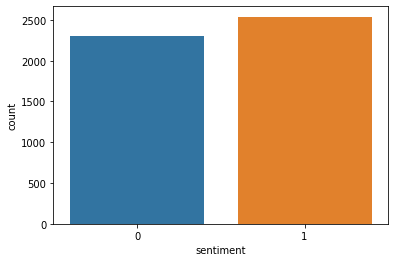

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(Global_headlines_df['sentiment'])

In [21]:
import re
cleanup_re = re.compile('[^a-z]+')
def clean(sentence): 
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = cleanup_re.sub(' ', sentence).strip()
  return sentence
Global_headlines_df['headline'] = Global_headlines_df['headline'].apply(clean)

In [22]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:
def preprocess(sentence):
  sentence = str(sentence)
  word_tokens = word_tokenize(sentence)
  stop_words = set(stopwords.words('english'))
  sentence = ' '.join([i for i in word_tokens if not i in stop_words])
  return sentence

Global_headlines_df['headline'] = Global_headlines_df['headline'].apply(preprocess)

In [26]:
Global_headlines_df.head()

,headline,sentiment
0,banking bill negotiators set compromise plan w...,1
1,manager journal sniffing drug abusers quick fix,0
2,bank montreal royal bank profits rose nd period,1
3,battle medical costs,0
4,dow falls late gm surge stanches losses,0


In [27]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def preprocess4(sentence):
  input_str=word_tokenize(sentence)
  lemmatized_output = ' '.join([lemma.lemmatize(w) for w in input_str])
  return lemmatized_output

Global_headlines_df['headline'] = Global_headlines_df['headline'].apply(preprocess4)

In [28]:
Global_headlines_df.head()

,headline,sentiment
0,banking bill negotiator set compromise plan wi...,1
1,manager journal sniffing drug abuser quick fix,0
2,bank montreal royal bank profit rose nd period,1
3,battle medical cost,0
4,dow fall late gm surge stanches loss,0


In [29]:
X = Global_headlines_df['headline']
y = Global_headlines_df['sentiment']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
pip install sklearn

In [34]:
X_train.shape, X_test.shape

((3876,), (970,))

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train)

#transform the train and test dataset
X_train_countvect = count_vect.transform(X_train)
X_test_countvect = count_vect.transform(X_test)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_train)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

In [37]:
 # ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X_train)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [38]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X_train)
xtrain_tfidf_ngram_char =  tfidf_vect_ngram_chars.transform(X_train)
xtest_tfidf_ngram_char =  tfidf_vect_ngram_chars.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [39]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return accuracy_score(predictions, y_test)

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
import io
import string
import re
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [42]:
# Logistic on Count Vectors
accuracy = train_model(LogisticRegression(), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Logistic on Word Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

# Logistic on Ngram Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("N-Gram Vectors: ", accuracy)

# Logistic on Character Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram_char, y_train, xtest_tfidf_ngram_char)
print("CharLevel Vectors: ", accuracy)

Count Vectors:  0.8144329896907216
WordLevel TF-IDF:  0.8247422680412371
N-Gram Vectors:  0.6257731958762887
CharLevel Vectors:  0.797938144329897


In [43]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(SVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

NB, N-Gram Vectors:  0.6175257731958763


In [44]:
accuracy = train_model(RandomForestClassifier(n_estimators=250, random_state=100), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Random Forest on Word Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

Count Vectors:  0.8175257731958763
WordLevel TF-IDF:  0.8030927835051547


In [45]:
accuracy = train_model(BaggingClassifier(), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Bagging on Word Level TF IDF Vectors
accuracy = train_model(BaggingClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

Count Vectors:  0.7948453608247422
WordLevel TF-IDF:  0.7762886597938145


In [46]:
import xgboost as xgb
accuracy = train_model(xgb.XGBClassifier(), X_train_countvect, y_train, X_test_countvect)
print("Count Vectors: ", accuracy)

# Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgb.XGBClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("WordLevel TF-IDF: ", accuracy)

Count Vectors:  0.743298969072165
WordLevel TF-IDF:  0.7329896907216494


### Classification using LSTM

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from keras.layers import Dropout

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler

In [49]:
#max words to be used
MAX_WORDS = 10000
#max length of the sequence
MAX_LEN = 50
#embedding dimension should be between 50 to 300
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print('number of unique tokens are: ', len(word_index))

number of unique tokens are:  6612


In [50]:
from keras.preprocessing.sequence import pad_sequences

In [51]:
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=MAX_LEN)
print('shape of data tensor is', X.shape)

shape of data tensor is (4846, 50)


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3876, 50) (3876,)
(970, 50) (970,)


In [53]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim= EMBEDDING_DIM, input_length=MAX_LEN))
model.add(SimpleRNN(300, recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history =model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 300)               120300    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 1,120,601
Trainable params: 1,120,601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
61/61 [==============================] - 8s 111ms/step - loss: 0.7215 - accuracy: 0.5100 - val_loss: 0.6846 - val_accuracy: 0.5526
Epoch 2/10
61/61 [==============================] - 6s 104ms/step - loss: 0.6857 - accuracy: 0.56

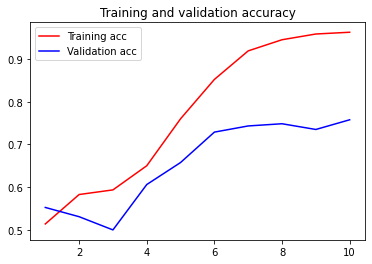

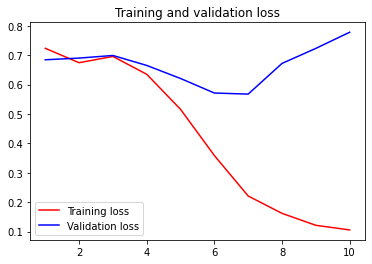

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()